<a href="https://colab.research.google.com/github/DevyaniPDev/Linear-Regression-Algorithms/blob/main/Advertisment_Prediction_BivariateLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/All csv files/Advertisement (1).csv')

In [ ]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


In [ ]:
data.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,760
196,94.2,4.9,8.1,970
197,177.0,9.3,6.4,1280
198,283.6,42.0,66.2,2550
199,232.1,8.6,8.7,1340


In [ ]:
data.shape

(200, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,1402.250000
std,85.854236,14.846809,21.778621,521.745657
min,0.700000,0.000000,0.300000,160.000000
25%,74.375000,9.975000,12.750000,1037.500000
50%,149.750000,22.900000,25.750000,1290.000000
75%,218.825000,36.525000,45.100000,1740.000000
max,296.400000,49.600000,114.000000,2700.000000


In [ ]:
data.describe(include="all")

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,1402.250000
std,85.854236,14.846809,21.778621,521.745657
min,0.700000,0.000000,0.300000,160.000000
25%,74.375000,9.975000,12.750000,1037.500000
50%,149.750000,22.900000,25.750000,1290.000000
75%,218.825000,36.525000,45.100000,1740.000000
max,296.400000,49.600000,114.000000,2700.000000


In [ ]:
data.notnull().sum()

,0
TV,200
radio,200
newspaper,200
sales,200


In [ ]:
data.isnull().sum()

,0
TV,0
radio,0
newspaper,0
sales,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.nunique()

,0
TV,190
radio,167
newspaper,172
sales,121


In [ ]:
data.radio.unique()

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4,  8.4, 25.7,
       22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8, 28.1,
       19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3, 24.6, 14.5,
       27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 43.7,  1.6, 28.5, 29.9,  7.7,
       20.3, 44.5, 43. , 18.4, 40.6, 25.5, 47.8,  4.9, 33.5, 36.5, 14. ,
       31.6, 21. , 42.3,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,
        0.4, 26.9,  8.2, 38. , 15.4, 20.6, 46.8, 35. ,  0.8, 36.9, 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. ,  2.9, 27.2,
       38.6, 47. , 39. , 28.9, 25.9, 17. , 35.4, 33.2, 14.8,  1.9,  7.3,
       40.3, 25.8, 13.9, 23.3, 39.7, 21.1, 11.6, 43.5,  1.3, 18.1, 35.8,
       36.8, 14.7,  3.4, 37.6,  5.2, 23.6, 10.6, 20

In [ ]:
data.loc[data.duplicated()]

,TV,radio,newspaper,sales


In [ ]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

Visual Analysis of data

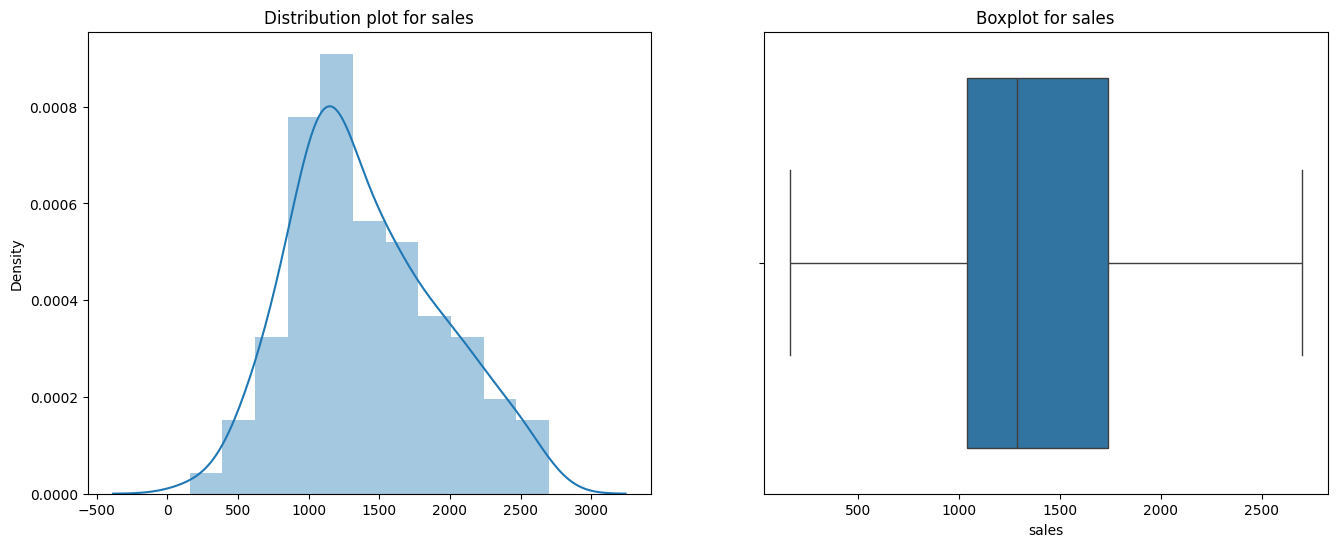

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(x=data.sales)
plt.title("Distribution plot for sales")

plt.subplot(1,2,2)
sns.boxplot(x=data.sales)
plt.title("Boxplot for sales")

plt.show()

In [ ]:
data.sales.describe()

,sales
count,200.000000
mean,1402.250000
std,521.745657
min,160.000000
25%,1037.500000
50%,1290.000000
75%,1740.000000
max,2700.000000


Visualising Categorical data

In [ ]:
data.select_dtypes('object').columns
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

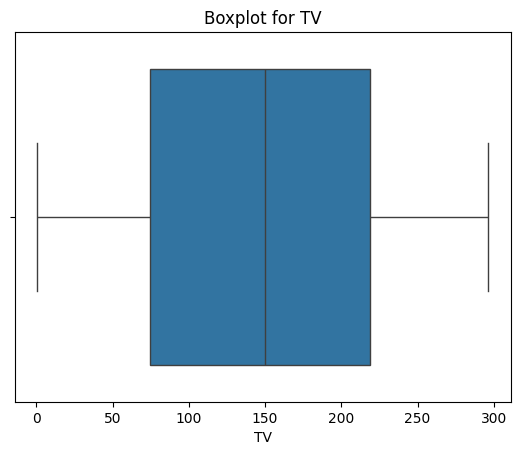

In [ ]:
plt.title("Boxplot for TV")
sns.boxplot(x=data.TV)
plt.show()

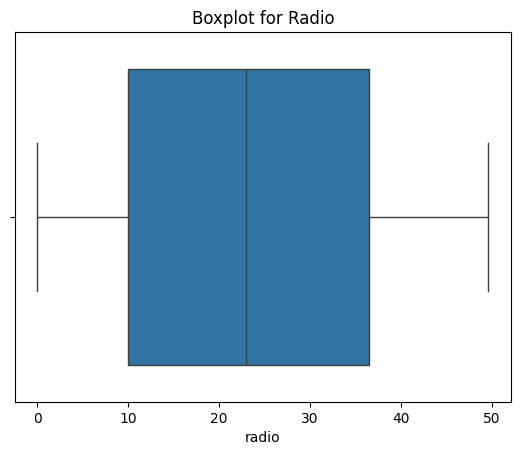

In [ ]:
plt.title("Boxplot for Radio")
sns.boxplot(x=data.radio)
plt.show()

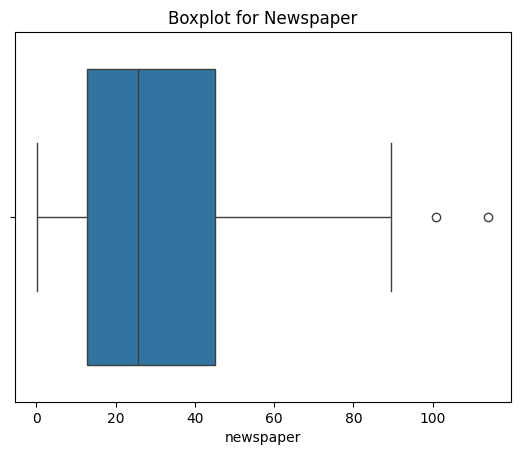

In [ ]:
plt.title("Boxplot for Newspaper")
sns.boxplot(x=data.newspaper)
plt.show()

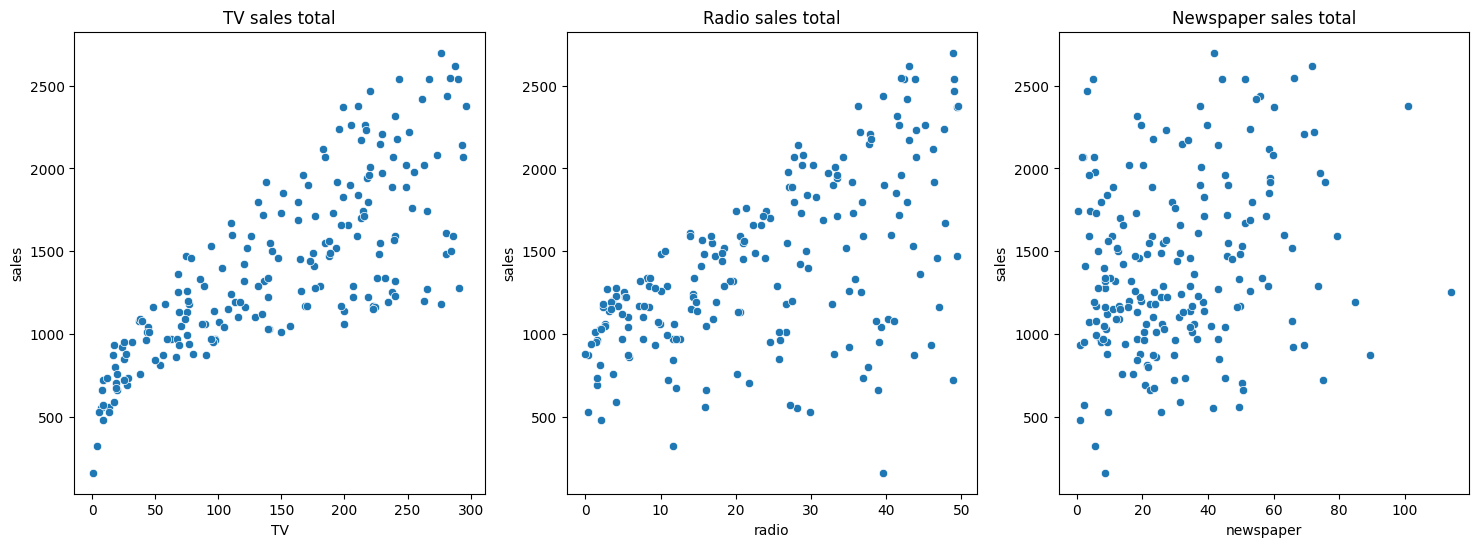

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.title("TV sales total")
sns.scatterplot(x=data.TV,y=data.sales)

plt.subplot(1,3,2)
plt.title("Radio sales total")
sns.scatterplot(x=data.radio,y=data.sales)

plt.subplot(1,3,3)
plt.title("Newspaper sales total")
sns.scatterplot(x=data.newspaper,y=data.sales)

plt.show()


In [ ]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


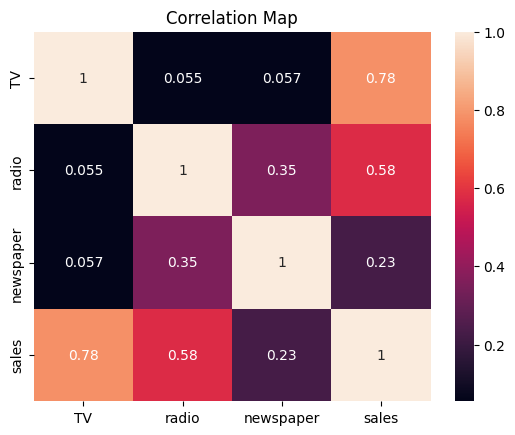

In [ ]:
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation Map")
plt.show()

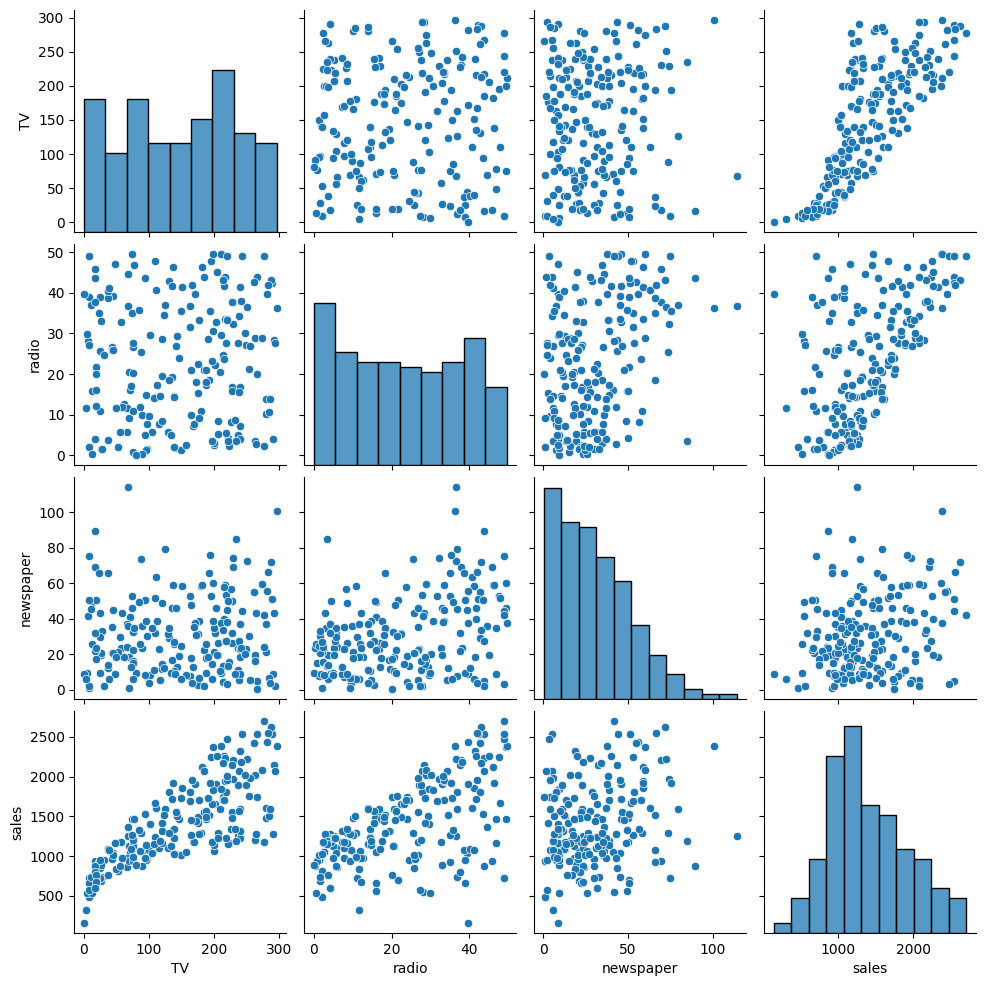

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
X=data.drop('sales', axis=1)
y = data['sales']

In [ ]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(X_train.shape, X_test.shape)

(150, 3) (50, 3)


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
print("Train Accuracy:", r2_score(lr.predict(X_train),y_train))
print("Test Accuracy:", r2_score(lr.predict(X_test),y_test))


Train Accuracy: 0.8847308591551801
Test Accuracy: 0.8843196200174289


This is good fit